### Error Scaling of Product Formulas

In [19]:
from gci_functions_1 import *

Define the transverse longitudinal field Ising model Hamiltonian as follows:

In [20]:
from simple_exact_diagonalization_routines.local_matrix_class import *
from scipy.linalg import expm
import matplotlib.pyplot as plt

# System size
L = 9

# Create objects of Pauli operators
X = X_class(L)
Y = Y_class(L)
Z = Z_class(L)
S_plus = S_plus_class(L)
S_minus = S_minus_class(L)

# Trivial initialization of the right size matrix
H_TFIM = 0*np.eye( 2**L ) 

for x in range(L-1):
    H_TFIM = H_TFIM + 2*X.at(x+1).dot(X.at(x+2)) + Z.at(x+1)
H_TFIM = H_TFIM + Z.at(L)    

# Trivial initialization of the right size matrix
hamiltonian_name = "TLFIM_L_" +str(L)
H_TLFIM = 0*np.eye( 2**L ) 

for x in range(L-1):
    H_TLFIM = H_TLFIM + 2*X.at(x+1).dot(X.at(x+2)) + Z.at(x+1)+ X.at(x+1)
H_TLFIM = H_TLFIM + Z.at(L)    + X.at(L)

### order = 1 Suzuki-Trotter Decomposition

Next, we calculate the following:

For the first-order product formula, which is the Suzuki-Trotter decomposition:
$S_1 := e^{i\hat{A}s}e^{i\hat{B}s} = e^{i(\hat{B}+\hat{A})s}+\mathcal{O}(s^2)$

which gives the line of best fit: 

$Y = mX + b$

where $Y = log(\|e^{i\hat{A}s}e^{i\hat{B}s} -e^{i(\hat{B}+\hat{A})s}\|) $
$X = log(s)$ \
$m = 2$ \
$b =$ unknown

In [21]:
s_list_ord1, sigma_norm_ord1 = higher_order_pf(H_TFIM,0.001, 0.12, 100, order=1)

KeyboardInterrupt: 

Text(0, 0.5, '$S_1:= e^{i\\hat{A}s}e^{i\\hat{B}s} -e^{i(\\hat{B}+\\hat{A})s}$')

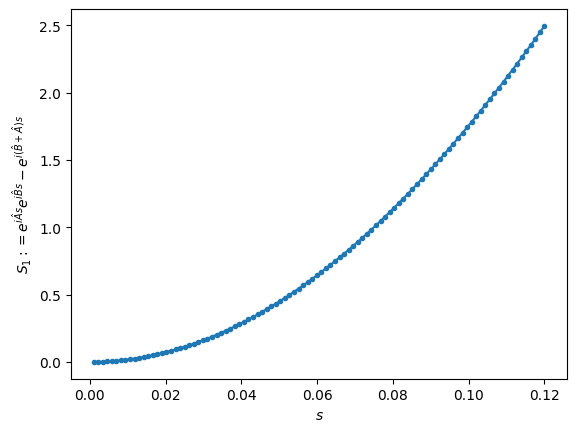

In [ ]:
plt.plot(s_list_ord1,sigma_norm_ord1, marker='o', markersize = 3, linestyle='-', label="Order 1")
plt.xlabel("$s$")
plt.ylabel("$S_1:= e^{i\hat{A}s}e^{i\hat{B}s} -e^{i(\hat{B}+\hat{A})s}$")

Now, we perform the fitting function for all the orders of product formulas:

Starting with order = 1

In [ ]:
# Calculate the slope (m) and y-intercept (b) using numpy's polyfit
x1 = np.log(s_list_ord1)  
y1= np.log(sigma_norm_ord1)  
m1, b1 = np.polyfit(x1, y1, 1)

# Create the line of best fit using the slope and y-intercept
line_of_best_fit1 = m1 * x1 + b1

1.989353478140477


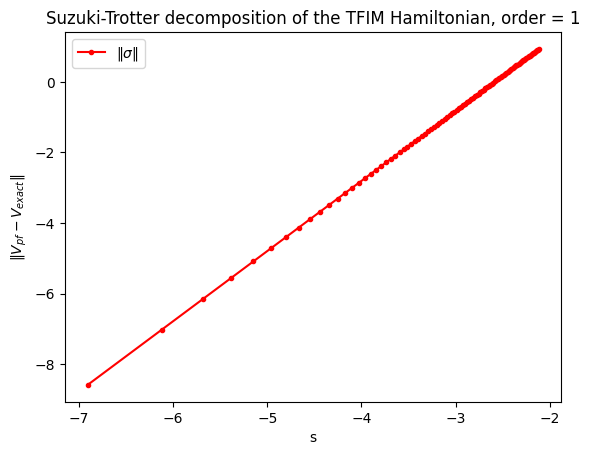

In [ ]:
plt.plot(x1, line_of_best_fit1, color = 'red',marker = 'o', markersize = 3)
plt.ylabel("$\|V_{pf} - V_{exact}\|$")
plt.xlabel("s")
plt.title('Suzuki-Trotter decomposition of the TFIM Hamiltonian, order = 1')
print(m1)
plt.legend(["$\|\sigma\|$", "slope = 1.989"])

In [ ]:
error_1 = (2-m1)*100/2
print("Error in percentage: ", error_1)

Error in percentage:  0.5323260929761542


We get a gradient $m^{(1)} = 1.989$ which is approximately $2$, in agreement with the theroetical predictions to an error of $0.532 \%$

### order = 2 Group Commutator Approximation

Now, we calculate the following:

For the first-order product formula, which is the Suzuki-Trotter decomposition:
For the second-order pure commutator product formula:
$S_2 := e^{xA}e^{xB}e^{-xA}e^{-xB} = e^{x^2[A,B]}+\mathcal{O}(x^3)$

which gives the line of best fit: 

$Y = mX + b$

where $Y = log(\| e^{xA}e^{xB}e^{-xA}e^{-xB} - e^{x^2[A,B]}\|) $ \
$X = log(x)$ \
$m = 3$ \
$b =$ unknown

In [ ]:
s_list_ord2, sigma_norm_ord2 = higher_order_pf(H_TFIM,0.001, 0.12, 100, order=2)
print(sigma_norm_ord1)

[0.0001810188029823639, 0.0008777308539008792, 0.0020974883735407875, 0.003840229088410198, 0.0061058640202475605, 0.008894277485919554, 0.01220532709729536, 0.016038843761103313, 0.020394631678776108, 0.025272468346294805, 0.03067210455403821, 0.036593264386650434, 0.04303564522293965, 0.04999891773581791, 0.05748272589229952, 0.0654866869535746, 0.0740103914751714, 0.08305340330722909, 0.09261525959489772, 0.10269547077888977, 0.11329352059620172, 0.12440886608102912, 0.13604093756590477, 0.14818913868307523, 0.16085284636615274, 0.17403141085206453, 0.18772415568332812, 0.20193037771068575, 0.21664934710599443, 0.23188030733016993, 0.24762247518574787, 0.26387504079136415, 0.2806371675936281, 0.29790799237260207, 0.3156866252478887, 0.33397214968534333, 0.3527636225044721, 0.3720600738865358, 0.3918605074099866, 0.41216389996148756, 0.43296920188485133, 0.45427533690563193, 0.4760812021639492, 0.49838566822779096, 0.5211875791073343, 0.5444857522703239, 0.5682789786585769, 0.5925660

In [ ]:
# Calculate the slope (m) and y-intercept (b) using numpy's polyfit
x2 = np.log(s_list_ord2)  
y2= np.log(sigma_norm_ord2)  
m2, b2 = np.polyfit(x2, y2, 1)

# Create the line of best fit using the slope and y-intercept
line_of_best_fit2 = m2 * x2 + b2

2.9831774931907313


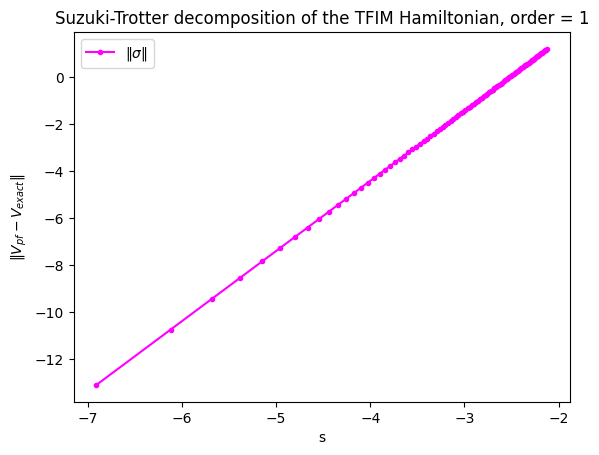

In [ ]:
plt.plot(x1, line_of_best_fit2, color = 'magenta',marker = 'o', markersize = 3)
plt.ylabel("$\|V_{pf} - V_{exact}\|$")
plt.xlabel("s")
plt.title('Suzuki-Trotter decomposition of the TFIM Hamiltonian, order = 1')
print(m2)
plt.legend(["$\|\sigma\|$", "slope = 1.989"])

In [ ]:
error_2 = (3-m2)*100/3
print("Error in percentage: ", error_2)

Error in percentage:  0.5607502269756223


We get a gradient m2 = $2.983$ which is approximately $3$, in agreement with the theroetical predictions to an error of $0.532 \%$

### order = 3 

Finally, for the third-order pure commutator product formula:
$S_3 := e^{\frac{\sqrt{5}-1}{2}xA}e^{\frac{\sqrt{5}-1}{2}xB}e^{-xA}e^{-\frac{\sqrt{5}+1}{2}xB}e^{\frac{3-\sqrt{5}}{2}xA}e^{xB} = e^{x^2[A,B]}+\mathcal{O}(x^4)$

which gives the line of best fit: 

$Y = mX + b$

where $Y = log(\| e^{\frac{\sqrt{5}-1}{2}xA}e^{\frac{\sqrt{5}-1}{2}xB}e^{-xA}e^{-\frac{\sqrt{5}+1}{2}xB}e^{\frac{3-\sqrt{5}}{2}xA}e^{xB} - e^{x^2[A,B]}\|) $ \
$X = log(x)$ \
$m = 4$ \
$b =$ unknown

In [ ]:
s_list_ord3, sigma_norm_ord3 = higher_order_pf(H_TFIM,0.001, 0.12, 100, order=3)
print(sigma_norm_ord3)

[3.6738879077148288e-09, 8.63790408238838e-08, 4.932842422696849e-07, 1.6535989977220045e-06, 4.180549323067825e-06, 8.871334341366733e-06, 1.670706973817502e-05, 2.885271798512077e-05, 4.665700522149001e-05, 7.165232466215156e-05, 0.00010555462638060969, 0.00015026329329501158, 0.00020786100316490922, 0.0002806135763868739, 0.00037096980935652014, 0.00048156129314574914, 0.0006152022172230783, 0.0007748891579279579, 0.0009638008513879884, 0.0011852979505514844, 0.0014429227659884948, 0.0017403989900944238, 0.00208163140431315, 0.0024707055907800188, 0.0029118875281901723, 0.003409623348097348, 0.003968538908112148, 0.004593439422193696, 0.0052893090570971186, 0.006061310508703371, 0.006914784557715895, 0.007855249604196608, 0.008888401180398952, 0.010020111441339772, 0.011256428632540498, 0.012603576534351396, 0.014067953882262936, 0.015656133762592728, 0.017374862920778954, 0.019231061336760818, 0.021231821218989023, 0.02338440649846514, 0.02569625204369016, 0.028174962895078648, 0.0

In [ ]:
# Calculate the slope (m) and y-intercept (b) using numpy's polyfit
x3 = np.log(s_list_ord3)  
y3= np.log(sigma_norm_ord3)  
m3, b3 = np.polyfit(x3, y3, 1)

# Create the line of best fit using the slope and y-intercept
line_of_best_fit3 = m3 * x3 + b3

3.9929881404710867


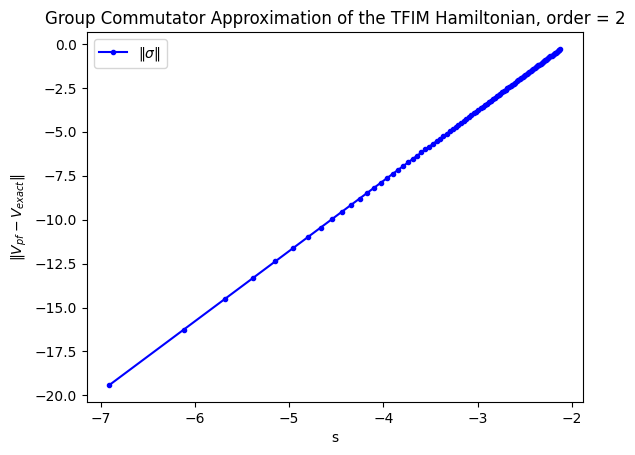

In [ ]:
plt.plot(x3, line_of_best_fit3, color = 'blue',marker='o',markersize =3)
plt.ylabel("$\|V_{pf} - V_{exact}\|$")
plt.xlabel("s")
plt.title('Group Commutator Approximation of the TFIM Hamiltonian, order = 2')
print(m3)
plt.legend(["$\|\sigma\|$", "slope = 1.989"])

In [ ]:
error_3 = (4-m3)*100/4
print("Error in percentage: ", error_3)

Error in percentage:  0.1752964882228314


### Error Scaling

We get a gradient $m^{(3)}$ = $3.993$ which is approximately $4$, in agreement with the theroetical predictions to an error of $0.175 \%$

Text(0.5, 1.0, 'Error scaling curves against flow duration for each order of product formula')

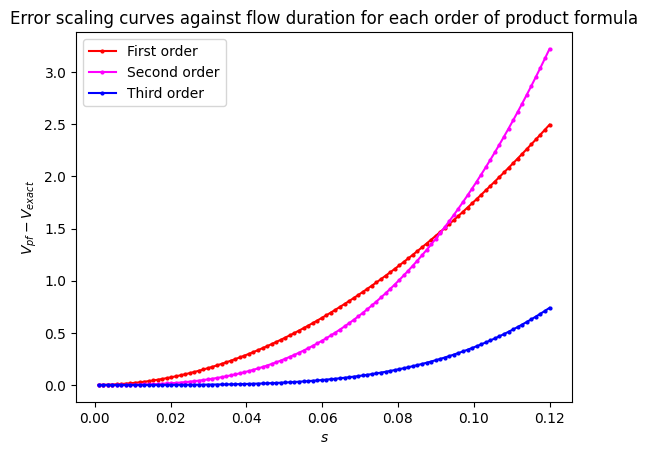

In [ ]:

plt.plot(s_list_ord1,sigma_norm_ord1,color = 'red', marker='o',markersize =2)
plt.plot(s_list_ord1,sigma_norm_ord2,color = 'magenta', marker='o',markersize =2)
plt.plot(s_list_ord1,sigma_norm_ord3,color = 'blue', marker='o',markersize =2)
plt.xlabel("$s$")
plt.ylabel("$V_{pf} - V_{exact}$")
plt.legend(["First order", "Second order", "Third order"])
plt.title('Error scaling curves against flow duration for each order of product formula')

Text(0.5, 1.0, 'log($\\mathcal{O}(s^n)$) against log($s$)')

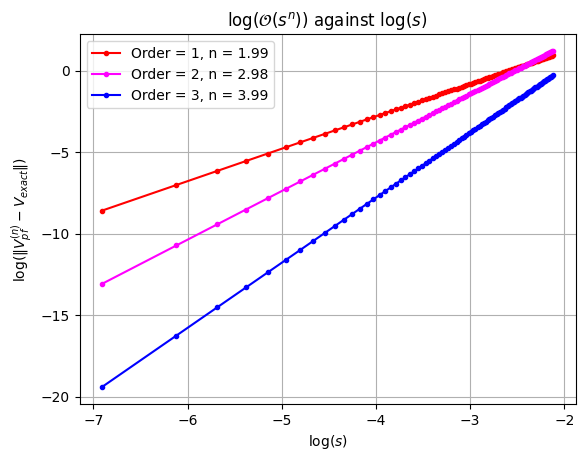

In [ ]:
plt.plot(x1,line_of_best_fit1, color = 'red',  marker = 'o',markersize =3 , label= f'Order = 1, n = {round(m1,2)}')
plt.plot(x1,line_of_best_fit2, color = 'magenta',marker = 'o',markersize =3, label = f'Order = 2, n = {round(m2,2)}')
plt.plot(x1,line_of_best_fit3, color = 'blue',marker = 'o',markersize =3, label = f'Order = 3, n = {round(m3,2)}')
plt.ylabel("log($\|V_{pf}^{(n)} - V_{exact}\|$)")
plt.xlabel("log($s$)")
plt
plt.grid(True)
legend_labels = ["Order 1","Order 2","Order 3"]
plt.legend()
plt.title('log($\mathcal{O}(s^n)$) against log($s$)')

It is important to note that for the purposes of DBI, we do not use the Suzuki-Trotter decomposition because it does not approximate an pure commutator ($e^{x[\hat{A},\hat{B}]}$) -  a core requirement - in formualting a DBI unitary operator.